1. Cargar conjunto de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# All imports here:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pathlib
import os
import time, datetime

from random import sample

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

#from keras_tuner.tuners import Hyperband
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras import Model


from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential




In [ ]:
data_train = '/content/drive/MyDrive/dataset_train_test/train'
data_test = '/content/drive/MyDrive/dataset_train_test/test'

PATH_TO_SAVE = '/content/drive/MyDrive/Colab Notebooks/TFM/results'

In [ ]:
# variables
img_height = 224
img_width =224
depth = 3
BATCH_SIZE = 32
labels = ['abdomen', 'brain', 'femur', 'maternal_cervix', 'others', 'spinal_cord', 'torax']
classes=len(labels)

inputsize = (img_height, img_width, depth)

In [ ]:
# Define the folders where the images are
folder_abdomen = '/content/drive/MyDrive//dataset_train_test/train/abdomen'
folder_brain = '/content/drive/MyDrive/dataset_train_test/train/brain'
folder_femur= '/content/drive/MyDrive/dataset_train_test/train/femur'
folder_maternal_cervix = '/content/drive/MyDrive/dataset_train_test/train/maternal_cervix'
folder_spinal_cord = '/content/drive/MyDrive/dataset_train_test/train/spinal_cord'
folder_torax = '/content/drive/MyDrive/dataset_train_test/train/torax'
folder_other = '/content/drive/MyDrive/dataset_train_test/train/other'

# list to load images and labels
X = []
y = []

# Funtion to load images and labels
def load_data(folder, label):
    for file_i in os.listdir(folder):
        path = os.path.join(folder, file_i)
        image = cv2.imread(path)

        if image is not None:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB Convertir de BGR a RGB
          image = cv2.resize(image, (224, 224))  # Resize to the same size
          X.append(image)
          y.append(label)


# load data to each folder
folders = [folder_abdomen, folder_brain,folder_femur,folder_maternal_cervix,folder_spinal_cord,folder_torax,folder_other]
for label, folder in zip(labels, folders):

  load_data(folder=folder, label=label)

In [ ]:
# Define the folders where the images are
folder_abdomen_test = '/content/drive/MyDrive/dataset_train_test/test/abdomen'
folder_brain_test = '/content/drive/MyDrive/dataset_train_test/test/brain'
folder_femur_test = '/content/drive/MyDrive/dataset_train_test/test/femur'
folder_maternal_cervix_test = '/content/drive/MyDrive/dataset_train_test/test/maternal_cervix'
folder_spinal_cord_test = '/content/drive/MyDrive/dataset_train_test/test/spinal_cord'
folder_torax_test = '/content/drive/MyDrive/dataset_train_test/test/torax'
folder_other_test = '/content/drive/MyDrive/dataset_train_test/test/other'

# list to load images and labels
X_test = []
y_test = []
# Funtion to load images and labels
def load_data(folder, label):
    for file_i in os.listdir(folder):
        path = os.path.join(folder, file_i)
        image = cv2.imread(path)

        if image is not None:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB Convertir de BGR a RGB
          image = cv2.resize(image, (224, 224))  # Resize to the same size
          X_test.append(image)
          y_test.append(label)

# load data to each folder
folders_test = [folder_abdomen_test, folder_brain_test,folder_femur_test,folder_maternal_cervix_test,folder_spinal_cord_test,folder_torax_test,folder_other_test]
for label, folder in zip(labels, folders_test):
   load_data(folder=folder, label=label)

In [ ]:
# Explore data to see if it is balanced
for label,folder in zip(labels, folders):
  folder_num = len(os.listdir(folder))
  print(f'Number of images of the class {label}: {folder_num}')



Number of images of the class adbomen: 908
Number of images of the class brain: 2207
Number of images of the class femur: 1678
Number of images of the class maternal_cervix: 1441
Number of images of the class spinal_cord: 849
Number of images of the class torax: 3295
Number of images of the class other: 2804


In [ ]:
# Explore data to see if it is balanced
for label,folder in zip(labels, folders_test):
  folder_num = len(os.listdir(folder))
  print(f'Number of images of the class {label}: {folder_num}')

Number of images of the class adbomen: 227
Number of images of the class brain: 552
Number of images of the class femur: 420
Number of images of the class maternal_cervix: 361
Number of images of the class spinal_cord: 213
Number of images of the class torax: 825
Number of images of the class other: 701


In [ ]:
X = np.array(X)
y = np.array(y)

# Verify the shape of the images and labels
print("Forma del array de imágenes:", X.shape)
print("Forma del array de etiquetas:", y.shape)



Forma del array de imágenes: (13094, 224, 224, 3)
Forma del array de etiquetas: (13094,)


In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print("Forma del array de imágenes para test:", X_test.shape)
print("Forma del array de etiquetas para test:", y_test.shape)

Forma del array de imágenes para test: (11800, 224, 224, 3)
Forma del array de etiquetas para test: (11800,)


In [ ]:
# split the training data into train and val
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, stratify=y ,random_state=42)


print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(10475, 224, 224, 3)
(10475,)
(2619, 224, 224, 3)
(2619,)


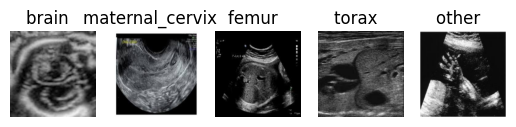

In [ ]:


indices_aleatorios = sample(range(len(x_train)), 5)
for i, idx in enumerate(indices_aleatorios):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(f'{y_train[idx]}  ')
    plt.axis('off')

plt.show()

#Check de imagenes and labels

In [ ]:
# Normalize the pixel values 
x_train = x_train.astype("float") / 255.0
x_val = x_val.astype("float") / 255.0
x_test = x_test.astype("float") / 255.0

In [ ]:
# Convert to one-hot encoding
label_encoder = LabelEncoder()


y_train_encoded = label_encoder.fit_transform(y_train)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=7)

# Convierte las etiquetas a números
y_val_encoded = label_encoder.fit_transform(y_val)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=7)



In [ ]:
label_encoder = LabelEncoder()

y_test_encoded = label_encoder.fit_transform(y_test)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=7)
print(X_test.shape)
print(y_test.shape)

(3280, 224, 224, 3)
(3280,)


In [ ]:
#Create  data generator

datagen = ImageDataGenerator(
    rotation_range=10, # grados de rotacion aleatoria
    width_shift_range=0.2, # fraccion del total (1) para mover la imagen
    height_shift_range=0.2, # fraccion del total (1) para mover la imagen
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    shear_range=0.15, # deslizamiento
    zoom_range=0.2, # rango de zoom
    fill_mode='nearest', # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2, # cambios aleatorios en los canales de la imagen
     validation_split=0.2 # no va a afectar a validación solo entrenamiento
)

vamos a visualizat el efecto del Data Augmentation sobre una muestra del conjunto de datos

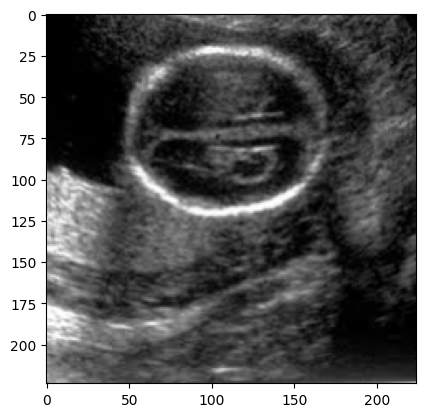

Label = brain
4470


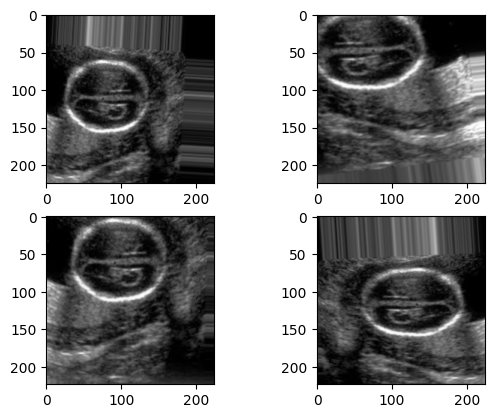

In [ ]:
from tensorflow.keras.preprocessing import image
import random
import matplotlib.pyplot as plt
%matplotlib inline

sample = 4470#random.randint(0, (x_train.shape[0]))
plt.imshow(image.array_to_img(x_train[sample]))
plt.show()

print('Label = {}'.format(labels[np.argmax(y_train_one_hot[sample])]))
print(sample)
fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(x_train[sample].reshape((1,224,224,3)),batch_size=1): # reshaoe porque el flow necesita tener el barch size al principio (batchsize, filas, columnas, canal)
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

# Keras Tuner: para realizar la optimización de los hiperparámetros.

Keras Tuner: para realizar la optimización de los hiperparámetros.
Keras Tuner es una libreria para obtener un conjuntoóptimo de hiperparámetros de forma automática.

Los hiperparámetros que encontramos son:

del modelo: influyen en la selección del modelo: número y ancho de capas ocultas.
del algorítmo: influyen en la velocidad, calidad del algorítmo de aprendizaje: learning rate para el cálculo del descenso de gradiente.

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
#Creamos nuestro modelo con tres capas convolucionales , una capa Flatten y dos densas
#utilizando keras-tuner para obtener la mejor configuracion de parametros para nuestra red

#Los hiperparámetros que va a buscar son el número de neuronas por capa y la tasa de aprendizaje

# Función para construir el modelo
def build_model(hp):
    model = keras.Sequential()

    # Convolutional Layers
    model.add(layers.Conv2D(hp.Int('conv1_filters', min_value=16, max_value=48, step=16), (5, 5), activation='relu', input_shape=inputsize))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv2_filters', min_value=64, max_value=256, step=16), (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv3_filters', min_value=64, max_value=256, step=16), (5, 5), activation='relu'))

    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    # Dense layers for classification
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='relu'))
    # Add the final classification layer.
    model.add(layers.Dense(7, activation='softmax'))  #  7 clases to classify

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
       metrics=[ "categorical_accuracy"]#, tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

    return model


In [ ]:

# Existen distintos algoritmos para encontrar los mejores hiperparámetros, por ejemplo Hyperband, está basado en modelos probabilísticos --> jmlr.org/papers/v18/16-558.html
# keras.io/api/keras_tuner/tuners
# grid search sería como fuerza bruta
# Initialize the sintonizer --> Max (val_accuracy)
tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=5,
    factor=3,
    directory='hyperband',
    project_name='image_classification1'
)

#Definimos un Early Stopping y se lo pasamos a tunner.search en callbacks controlando la perdida en validación

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Buscamos de hiperparámetros
tuner.search(datagen.flow(x_train, y_train_one_hot, batch_size=32,
         subset='training'), # indicar que es de training por haber hecho validation split
         validation_data=datagen.flow(x_train, y_train_one_hot,
         batch_size=16, subset='validation'),epochs=10 , callbacks=[early_stopping],verbose=2)
#tuner.search(train_generator, epochs=10,  validation_data=validation_generator)#, callbacks=[early_stopping],verbose=2)
#tuner.search(train_img,train_lables,  epochs=5,  validation_data=(val_img,val_lables),batch_size = 32) #,  callbacks=[early_stopping],verbose=2)

Trial 10 Complete [00h 09m 33s]
val_loss: 1.7172948122024536

Best val_loss So Far: 1.66244375705719
Total elapsed time: 00h 58m 24s


In [ ]:
# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Hyperparameters: {best_hps}")

Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7ebf5c5b3220>


In [ ]:
# Obtenemos la mejor prueba
best_trial = tuner.oracle.get_best_trials(1)[0]

# Imprimimos información del modelo y hiperparámetros
print("Arquitectura del Mejor Modelo:")
best_trial_model = best_trial.hyperparameters.values
print(best_trial_model)

# hiperparámetros del mejor modelo
print("\nHiperparámetros del Mejor Modelo:")
best_hyperparameters = best_trial.hyperparameters.values
print(best_hyperparameters)

# Imprimo configuración completa del mejor modelo
print("\nConfiguración Completa del Mejor Modelo:")
# configuración de hiperparámetros
best_configuration = tuner.get_best_hyperparameters()[0]
print(best_configuration)


Arquitectura del Mejor Modelo:
{'conv1_filters': 48, 'conv2_filters': 64, 'conv3_filters': 64, 'dropout': True, 'dense_units': 128, 'learning_rate': 0.0001, 'tuner/epochs': 5, 'tuner/initial_epoch': 2, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0000'}

Hiperparámetros del Mejor Modelo:
{'conv1_filters': 48, 'conv2_filters': 64, 'conv3_filters': 64, 'dropout': True, 'dense_units': 128, 'learning_rate': 0.0001, 'tuner/epochs': 5, 'tuner/initial_epoch': 2, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0000'}

Configuración Completa del Mejor Modelo:


In [ ]:
# Entrenamos el modelo con la configuracion de keras tuner
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)


In [ ]:
log_dir = PATH_TO_SAVE+ "/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


checkpoint_filepath = PATH_TO_SAVE+"/"+"{epoch:03d}_weights-improvement.h5" #pathout+"/model_checkpoint.h5" #datetime.datetime.now().strftime("%Y%m%d-%H%M%S"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=32,
         subset='training'), # indicar que es de training por haber hecho validation split
         validation_data=datagen.flow(x_val, y_val_one_hot,
         batch_size=16, subset='validation'),
          epochs=300, callbacks=[tensorboard_callback, callbacks_list])



val_acc_per_epoch = H.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [ ]:
plt.plot(H.history['categorical_accuracy'])
plt.plot(H.history['val_categorical_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epochs')
plt.legend(['Entrenamiento', 'val'], loc='upper left')
plt.savefig(PATH_TO_SAVE+"/accuracy.png")

plt.figure()

Evaluación del modelo:

In [ ]:
# cargar el modelo:
# load model:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/modelo/226_weights-improvement.h5')

# Check its architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 48)      3648      
                                                                 
 batch_normalization_1 (Bat  (None, 220, 220, 48)      192       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 48)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 106, 106, 64)      76864     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                            
                                                      

In [ ]:

# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(X_test, batch_size=32)

print(classification_report(y_test_one_hot.argmax(axis=1), predictions.argmax(axis=1), target_names =labels))

[INFO]: Evaluando red neuronal...
103/103 [==============================] - 1s 6ms/step
                 precision    recall  f1-score   support

        adbomen       0.30      0.24      0.27       227
          brain       0.65      0.61      0.63       548
          femur       0.54      0.69      0.61       416
maternal_cervix       0.71      0.61      0.66       356
          other       0.59      0.56      0.58       700
    spinal_cord       0.59      0.31      0.41       213
          torax       0.56      0.66      0.61       820

       accuracy                           0.58      3280
      macro avg       0.56      0.53      0.54      3280
   weighted avg       0.58      0.58      0.57      3280



1/1 [==============================] - 0s 20ms/step


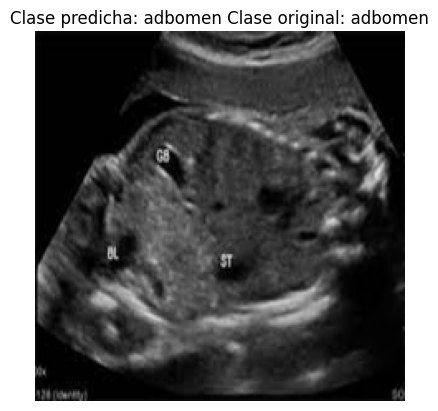

In [ ]:
import random

n = random.randint(0, 299)

imagen= X_test[n]
imagen_expandida = np.expand_dims(imagen , axis=0)

#predicción
prediccion = model.predict(imagen_expandida)

clase_predicha = np.argmax(prediccion)

etiqueta_real = np.argmax(y_test_one_hot[n])

plt.imshow(imagen)
plt.title(f'Clase predicha: {labels[clase_predicha]} Clase original: {labels[etiqueta_real]}')
plt.axis('off')

plt.show()

Entrenar red preentrenada: aplicar finetunning descongelando capas


In [ ]:

# documentacion https://keras.io/applications/
# import VGG16 with imagenet's weights y without top_model
base_model = VGG16(weights='imagenet', # 
                 include_top=False, # do not include  top model, i.e. to classification task (fully connected layers)
                 input_shape=inputsize) #  specify the input size of the model

base_model.summary()



58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
num_layers = len(base_model.layers)
print(f"Number of layers: {num_layers}")

Number of layers: 19


In [ ]:
# Set all layers in the convolutional base to Trainable (will FREEZE initial layers further below).
base_model.trainable = True

# Specify the number of layers to fine tune at the end of the convolutional base.
num_layers_fine_tune = 4
num_layers = len(base_model.layers)

# Freeze the initial layers in the convolutional base.
for model_layer in base_model.layers[:num_layers - num_layers_fine_tune]:
    print(f"FREEZING LAYER: {model_layer}")
    model_layer.trainable = False

print("\n")
print(f"Configured to fine tune the last ", num_layers_fine_tune, " convolutional layers...")
print("\n")

print(base_model.summary())

FREEZING LAYER: <keras.src.engine.input_layer.InputLayer object at 0x7d36014ff9a0>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d35529e65c0>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d35529e72e0>
FREEZING LAYER: <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7d35529e7be0>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d35529e7700>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d35500b8b80>
FREEZING LAYER: <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7d35500ba110>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d35500ba980>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d35500ba1d0>
FREEZING LAYER: <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d35500bbe20>
FREEZING LAYER: <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7d3549f68130>
FREEZING LAYER: 

In [ ]:
# Freeze the last 4 layers of the convolutional blocks, the fifth is re-trained
# In base_model.layers.name we have the information of the layer
for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')

Capa input_4 congelada...
Capa block1_conv1 congelada...
Capa block1_conv2 congelada...
Capa block1_pool congelada...
Capa block2_conv1 congelada...
Capa block2_conv2 congelada...
Capa block2_pool congelada...
Capa block3_conv1 congelada...
Capa block3_conv2 congelada...
Capa block3_conv3 congelada...
Capa block3_pool congelada...
Capa block4_conv1 congelada...
Capa block4_conv2 congelada...
Capa block4_conv3 congelada...
Capa block4_pool congelada...


In [ ]:
# the last layer of the model will be the first of our classificator
last = base_model.layers[-1].output

In [ ]:


x = Flatten()(last)
x = Dense(512, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dense(classes, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# Compilamos el modelo
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=[ "categorical_accuracy"])


model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
PATH_TO_SAVE_VGG16= '/content/drive/MyDrive/Colab Notebooks/TFM/results_VGG'
log_dir = PATH_TO_SAVE+ "/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


lr_reduce = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.6, patience=8, verbose=1, mode='min', min_lr=5e-5)

checkpoint_filepath = PATH_TO_SAVE+"/"+"{epoch:03d}_weights-improvement.h5" #pathout+"/model_checkpoint.h5" #datetime.datetime.now().strftime("%Y%m%d-%H%M%S"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, lr_reduce]

In [ ]:
# Etrain the model with data augmentation

print("[INFO]: Entrenando la red...")
H = model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=128,
         subset='training'), # indicar que es de training por haber hecho validation split
         validation_data=datagen.flow(x_val, y_val_one_hot,
         batch_size=128, subset='validation'),
          epochs=100, callbacks=[tensorboard_callback, callbacks_list])


[INFO]: Entrenando la red...
Epoch 1/100
66/66 [==============================] - ETA: 0s - loss: 1.2687 - accuracy: 0.5700
Epoch 1: loss improved from 1.29207 to 1.26868, saving model to /content/drive/MyDrive/Colab Notebooks/TFM/results/001_weights-improvement.h5
66/66 [==============================] - 100s 2s/step - loss: 1.2687 - accuracy: 0.5700 - val_loss: 1.3466 - val_accuracy: 0.5698 - lr: 0.0010
Epoch 2/100
66/66 [==============================] - ETA: 0s - loss: 1.2499 - accuracy: 0.5748
Epoch 2: loss improved from 1.26868 to 1.24986, saving model to /content/drive/MyDrive/Colab Notebooks/TFM/results/002_weights-improvement.h5
66/66 [==============================] - 97s 1s/step - loss: 1.2499 - accuracy: 0.5748 - val_loss: 1.3761 - val_accuracy: 0.5526 - lr: 0.0010
Epoch 3/100
66/66 [==============================] - ETA: 0s - loss: 1.2243 - accuracy: 0.5845
Epoch 3: loss improved from 1.24986 to 1.22432, saving model to /content/drive/MyDrive/Colab Notebooks/TFM/results/00

<Figure size 640x480 with 0 Axes>

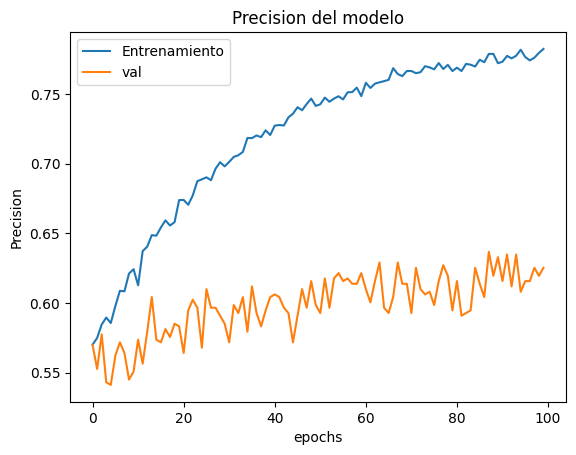

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epochs')
plt.legend(['Entrenamiento', 'val'], loc='upper left')
plt.savefig(PATH_TO_SAVE+"/accuracy.png")

plt.figure()

In [ ]:
val_acc_per_epoch = H.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Best epoch: 88


In [ ]:

# load model:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/vgg16/088_weights-improvement.h5')

# Check its architecture
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:

# Evaluando el modelo de predicción con las imágenes de test (Google dataset)
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(X_test, batch_size=32)

print(classification_report(y_test_one_hot.argmax(axis=1), predictions.argmax(axis=1)))

[INFO]: Evaluando red neuronal...
103/103 [==============================] - 12s 122ms/step
              precision    recall  f1-score   support

           0       0.37      0.31      0.34       227
           1       0.65      0.68      0.67       548
           2       0.74      0.69      0.71       416
           3       0.70      0.72      0.71       356
           4       0.63      0.68      0.65       700
           5       0.73      0.41      0.53       213
           6       0.65      0.71      0.68       820

    accuracy                           0.65      3280
   macro avg       0.64      0.60      0.61      3280
weighted avg       0.65      0.65      0.64      3280



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred =  predictions.argmax(axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_one_hot.argmax(axis=1), y_pred)
print(cm)

# Convertir la matriz de confusión en porcentajes
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap="Blues", cbar=False,  xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (%)')
plt.show()


In [ ]:
# Define the folders where the images are
folder_abdomen_test = '/content/drive/MyDrive/images/abdomen'
folder_brain_test = '/content/drive/MyDrive/images/brain'
folder_femur_test = '/content/drive/MyDrive/images/femur'
folder_maternal_cervix_test = '/content/drive/MyDrive/images/maternal_cervix'
folder_spinal_cord_test = '/content/drive/MyDrive/images/spinal_cord'
folder_torax_test = '/content/drive/MyDrive/images/torax'
folder_other_test = '/content/drive/MyDrive/images/other'

# list to load images and labels
X_test_paper = []
y_test_paper = []
# Funtion to load images and labels
def load_data(folder, label):
    for file_i in os.listdir(folder):
        path = os.path.join(folder, file_i)
        image = cv2.imread(path)

        if image is not None:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB Convertir de BGR a RGB
          image = cv2.resize(image, (224, 224))  # Resize to the same size
          X_test_paper.append(image)
          y_test_paper.append(label)
        else:
          print(path)
# load data to each folder

folders_test = [folder_abdomen_test, folder_brain_test,folder_femur_test,folder_maternal_cervix_test,folder_spinal_cord_test,folder_torax_test,folder_other_test]
for label, folder in zip(labels, folders_test):
  print(f"{label}----{folder}")
  load_data(folder=folder, label=label)´
  

In [ ]:
X_test_paper = np.array(X_test_paper)
y_test_paper = np.array(y_test_paper)
print("Forma del array de imágenes para test:", X_test_paper.shape)
print("Forma del array de etiquetas para test:", y_test_paper.shape)
# Convierte las etiquetas a números
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test_paper)
y_test_one_hot_p = to_categorical(y_test_encoded, num_classes=7)
print(X_test_paper.shape)
print(y_test_paper.shape)
# Explore data from paper (hospital data):
for label,folder in zip(labels, folders_test):
  folder_num = len(os.listdir(folder))
  print(f'Number of images of the class {label}: {folder_num}')

Forma del array de imágenes para test: (12400, 224, 224, 3)
Forma del array de etiquetas para test: (12400,)
(12400, 224, 224, 3)
(12400,)


In [ ]:
# Explore data from paper (hospital data):
for label,folder in zip(labels, folders_test):
  folder_num = len(os.listdir(folder))
  print(f'Number of images of the class {label}: {folder_num}')

Number of images of the class adbomen: 711
Number of images of the class brain: 3092
Number of images of the class femur: 1040
Number of images of the class maternal_cervix: 1626
Number of images of the class other: 0
Number of images of the class spinal_cord: 1718
Number of images of the class torax: 4213


In [ ]:
## Results over dataset from hospital

print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(X_test_paper, batch_size=32)


print(classification_report(y_test_one_hot_p.argmax(axis=1), predictions.argmax(axis=1), target_names=labels))

[INFO]: Evaluando red neuronal...
369/369 [==============================] - 11s 21ms/step
              precision    recall  f1-score   support

           0       0.30      0.18      0.22       611
           1       0.91      0.84      0.88      2992
           2       0.58      0.73      0.64       940
           3       0.89      0.81      0.85      1526
           4       0.72      0.27      0.39      4113
           5       0.02      0.67      0.04         3
           6       0.33      0.92      0.49      1618

    accuracy                           0.60     11803
   macro avg       0.54      0.63      0.50     11803
weighted avg       0.70      0.60      0.60     11803



In [ ]:



y_pred =  predictions.argmax(axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_one_hot_p.argmax(axis=1), y_pred)
print(cm)

# Convertir la matriz de confusión en porcentajes
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap="Blues", cbar=False,  xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (%)')
plt.show()

Explore  other Neural Networks


In [ ]:
PATH_TO_SAVE_resnet= '/content/drive/MyDrive/Colab Notebooks/TFM/results_resnet50'

In [ ]:
# load the ResNet-50 network, ensuring the head FC layer sets are left

base_model = tf.keras.applications.ResNet50V2(weights= "imagenet", include_top=False, input_shape= (img_height,img_width,3))
base_model.trainable=False
inputs = tf.keras.Input(inputsize)
x = base_model(inputs, training=False)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.GlobalAveragePooling2D()(x)
#x = tf.keras.layers.Dropout(0.25)(x)
outputs = tf.keras.layers.Dense(classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)


In [ ]:
# Compile frozen conv_base + UNfrozen top block + my top layer ... SLOW LR

model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("model compiled")
print(model.summary())

model compiled
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dense_2 (Dense)             (None, 7, 7, 512)         1049088   
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 7)                 175623    
                                                                 
Total params: 24789511 (94.56 MB)
Trainable pa

In [ ]:
# Long training with fine tuning

history = model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=128,
         subset='training'), # indicar que es de training por haber hecho validation split
         validation_data=datagen.flow(x_val, y_val_one_hot,
         batch_size=128, subset='validation'),
          epochs=50, callbacks=[tensorboard_callback, callbacks_list])





In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Best epoch: 26


[INFO]: Evaluando red neuronal...
103/103 [==============================] - 2s 17ms/step
                 precision    recall  f1-score   support

        adbomen       0.36      0.32      0.34       227
          brain       0.62      0.70      0.66       548
          femur       0.77      0.71      0.74       416
maternal_cervix       0.71      0.70      0.70       356
          other       0.52      0.51      0.52       213
    spinal_cord       0.66      0.70      0.68       820
          torax       0.67      0.62      0.65       700

       accuracy                           0.65      3280
      macro avg       0.62      0.61      0.61      3280
   weighted avg       0.65      0.65      0.64      3280



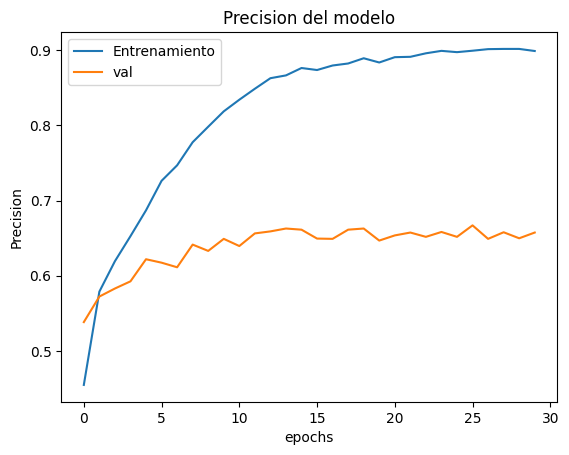

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epochs')
plt.legend(['Entrenamiento', 'val'], loc='upper left')
plt.savefig(PATH_TO_SAVE+"/accuracy.png")

plt.figure()
model.save('/content/drive/MyDrive/resnet50_Finetunning_da.h5')
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(X_test, batch_size=32)

print(classification_report(y_test_one_hot.argmax(axis=1), predictions.argmax(axis=1), target_names =labels))

Ahora probamos sobre el conjunto de imágenes del paper

In [ ]:

# load model:
model = tf.keras.models.load_model('/content/drive/MyDrive/resnet50_Finetunning_da.h5')

# Check its architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:

# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(X_test_paper, batch_size=64)

print(classification_report(y_test_one_hot_p.argmax(axis=1), predictions.argmax(axis=1), target_names=labels))
